In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import itertools

DATA PREPROCESSING

In [0]:
dfi = pd.read_csv('wdbc.dataset', header=None)
dfi = dfi.dropna()
#print(df.shape)
#print(list(df.columns))

#print(df.info())

#print(df.dtypes)
dfi.head(3)
#print(df)

#dropping ids
dfi = dfi.drop(0,1)
#print(dfi)

#mapping M to 1 and B to 0
dfi[1] = dfi[1].map({'M':1,'B':0})

#print(dfi)
df=((dfi-dfi.min())/(dfi.max()-dfi.min()))*20
df[1] = dfi[1]

#print(df)


In [0]:
train, test = train_test_split(df,test_size = 0.2, random_state = 2)
#print(test)
test, val = train_test_split(test,test_size = 0.5, random_state = 2)
#print(test)
#print(val)
#print(train)

In [0]:
train_x = train.loc[:,2:31]
train_y = train.loc[:,1]

In [0]:
test_x = test.loc[:,2:31]
test_y = test.loc[:,1] 

In [0]:
val_x = val.loc[:,2:31]
val_y = val.loc[:,1]

In [0]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)
val_x = np.asarray(val_x)
val_y = np.asarray(val_y)

FUNCTION FOR TRAINING MODEL

In [0]:
def model(train_x, train_y, epoch, alpha):
  
  # no. of features
  # dim = train_x.shape[1]

  w = np.zeros(train_x.shape[1])

  b = 0

  m = train_y.size


  for i in range(epoch):
    z = np.dot(train_x, w)
    h = sigmoid(z)
    grad = np.dot(train_x.T, (h-train_y))/m
    w -= alpha*grad #updating the weight

    #calculating loss

    if (epoch % 10 == 0):
      z = np.dot(train_x, w)
      h = sigmoid(z)
      #print(h)
      loss = (-train_y * np.log(h) - (1 - train_y) * np.log(1 - h)).mean()
      
      #print(loss)

  # w = w.reshape(train_x.shape[0], 1)
  
  d = {"w":w, "loss":loss}

  return d 



In [0]:
def sigmoid(z):
  return(1 / (1+np.exp(-z)))


SETTING HYPERPARAMETERS

In [0]:
lr = [0.0001]

noi = [20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
aa = [100000]
loss_list = []
w_list = []

# for a in range(len(lr)):
#   d = model(train_x, train_y, epoch = 1000, alpha = lr[a])
#   loss = d["loss"]
#   w = d["w"]
#   loss_list.append(loss)
#   w_list.append(w)
#   a += a

for a in range(len(noi)):
  d = model(train_x, train_y, epoch = noi[a], alpha = 0.00008)
  loss = d["loss"]
  w = d["w"]
  loss_list.append(loss)
  w_list.append(w)
  a += a  

  

#print(loss_list)
#print(w_list)

METHOD FOR PREDICTING

In [0]:
def predict (data, w):
  m = data.shape[1]
  y_prediction = np.zeros((1,m))
  w = w.reshape(data.shape[0],1)
  b = 0
  A = sigmoid(np.dot(w.T, data)+b)
  zero = []
  one = []
  pat_z = []
  pat_o = []
  A_list = list(itertools.chain.from_iterable(A.tolist()))


  for i in range(len(A_list)):
    if (A_list[i] < 0.5):
      zero.append(A_list[i])
      pat_z.append(i)
    else:
      one.append(A_list[i])
      pat_o.append(i) 

  #plotting scatter for test

  #x = 0.5
  #plt.scatter(zero, pat_z)
  #plt.scatter(one, pat_o)
  #plt.axvline(x, c = "red")
  #plt.show()

  for i in range(A.shape[1]):
    if(A[0,i]<0.5):
      y_prediction[0,i] = 0
    else:
      y_prediction[0,i] = 1

  return y_prediction  
 

CALCULATING PERFORMANCE METRICS

In [0]:
def performance(data_y, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if data_y[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and data_y[i]!=y_pred[i]:
           FP += 1
        if data_y[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and data_y[i]!=y_pred[i]:
           FN += 1



    return (TP,FP,TN,FN)



CALLING PREDICTION FUNCTION

In [54]:
train_acc = []
test_acc = []
val_acc = []

for i in range(len(w_list)):
  y_prediction_train = predict(train_x.T, w_list[i])
  y_prediction_test = predict(test_x.T, w_list[i])
  y_prediction_val = predict(val_x.T, w_list[i])

  print("\nTrain accuracy " + ": {} %".format(100 - np.mean(np.abs(y_prediction_train - train_y.T)) * 100))
  trainacc = (100 - np.mean(np.abs(y_prediction_train - train_y.T)) * 100)
  train_acc.append(trainacc)

  print("\nValidation accuracy " + ": {} %".format(100 - np.mean(np.abs(y_prediction_val - val_y.T)) * 100))
  valacc = (100 - np.mean(np.abs(y_prediction_val - val_y.T)) * 100)
  val_acc.append(valacc)

  print("\nTest accuracy " + ": {} %".format(100 - np.mean(np.abs(y_prediction_test - test_y.T)) * 100))
  testacc = (100 - np.mean(np.abs(y_prediction_test - test_y.T)) * 100)
  test_acc.append(testacc)

  y_prediction_test = [y for x in y_prediction_test for y in x]

  TP,FP,TN,FN = performance(test_y, y_prediction_test)
  print(TP, FP, TN, FN)




Train accuracy : 90.76923076923077 %

Validation accuracy : 96.49122807017544 %

Test accuracy : 87.71929824561404 %
19 2 31 5

Train accuracy : 92.3076923076923 %

Validation accuracy : 96.49122807017544 %

Test accuracy : 87.71929824561404 %
19 2 31 5

Train accuracy : 92.96703296703296 %

Validation accuracy : 96.49122807017544 %

Test accuracy : 87.71929824561404 %
19 2 31 5

Train accuracy : 93.62637362637362 %

Validation accuracy : 96.49122807017544 %

Test accuracy : 89.47368421052632 %
19 1 32 5

Train accuracy : 94.72527472527473 %

Validation accuracy : 96.49122807017544 %

Test accuracy : 89.47368421052632 %
19 1 32 5

Train accuracy : 95.38461538461539 %

Validation accuracy : 98.24561403508773 %

Test accuracy : 91.2280701754386 %
20 1 32 4

Train accuracy : 95.38461538461539 %

Validation accuracy : 98.24561403508773 %

Test accuracy : 91.2280701754386 %
20 1 32 4

Train accuracy : 95.38461538461539 %

Validation accuracy : 98.24561403508773 %

Test accuracy : 92.982456

GRAPHS

Text(0.5, 0, 'Epoch')

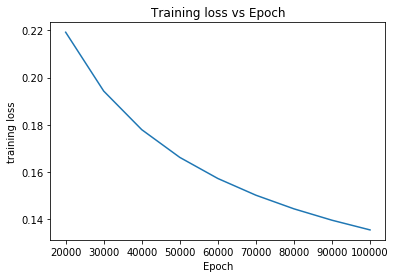

In [58]:
plt.plot (noi, loss_list) 
plt.title ('Training loss vs Epoch')
plt.ylabel('training loss')
plt.xlabel('Epoch')
#plt.xticks(lr, rotation='vertical')


Text(0.5, 0, 'Learning Rate')

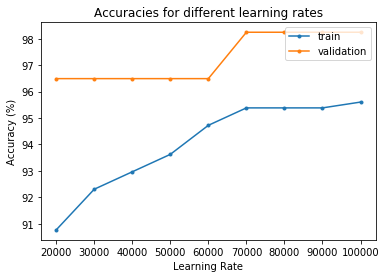

In [59]:
#plt.plot (loss_list, )
x = [1,2,3,4,5,6,7]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(noi, train_acc, label = "train", marker = ".")
ax.plot (noi, val_acc, label = "validation", marker = ".")
#ax.plot (x, test_acc, label = "test", marker = ".")
ax.legend(loc = "upper right")
plt.title ('Accuracies for different epoch')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')